# jupyter-notebook с исследованием времени работы различных операций с b-tree-list

### 0. Добавим библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Получим названия для файлов.

In [2]:
test_groups = ['insert', 'extract', 'set']
sizes_list = [10 ** i for i in range(1, 9)]

file_names = {}
for test_group in test_groups:
    for size in sizes_list:
        file_names[(test_group, size)] = test_group + "s_test_" + str(size) + ".txt"

In [3]:
for i in file_names:
    print(file_names[i])

inserts_test_10.txt
inserts_test_100.txt
inserts_test_1000.txt
inserts_test_10000.txt
inserts_test_100000.txt
inserts_test_1000000.txt
inserts_test_10000000.txt
inserts_test_100000000.txt
extracts_test_10.txt
extracts_test_100.txt
extracts_test_1000.txt
extracts_test_10000.txt
extracts_test_100000.txt
extracts_test_1000000.txt
extracts_test_10000000.txt
extracts_test_100000000.txt
sets_test_10.txt
sets_test_100.txt
sets_test_1000.txt
sets_test_10000.txt
sets_test_100000.txt
sets_test_1000000.txt
sets_test_10000000.txt
sets_test_100000000.txt


### 2. Скомпонуем данные для построения графиков

In [4]:
tables = {}
for test_group in test_groups:
    new_table = pd.DataFrame(columns=[])
    for size in sizes_list:
        new_column = pd.read_csv(file_names[(test_group, size)], header=None)
        new_column.columns = [str(size)]
        new_table = pd.concat([new_table, new_column], axis=1)
    tables[test_group] = new_table

In [5]:
means = {}
for test_group in test_groups:
    means[test_group] = tables[test_group].mean()

### 3. Построим графики

In [6]:
def DrawPlot(table, x_label, y_label, title):
    plt.figure(figsize=(9, 6))
    plt.plot(table)
    plt.xlabel(xlabel=x_label, fontsize=15)
    plt.ylabel(ylabel=y_label, fontsize=15)
    plt.title(label=title, fontsize=20)
    plt.show()

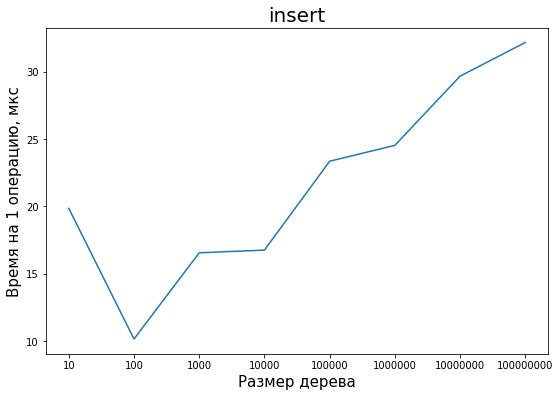

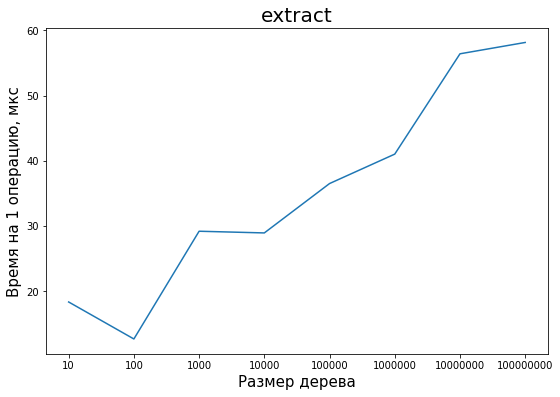

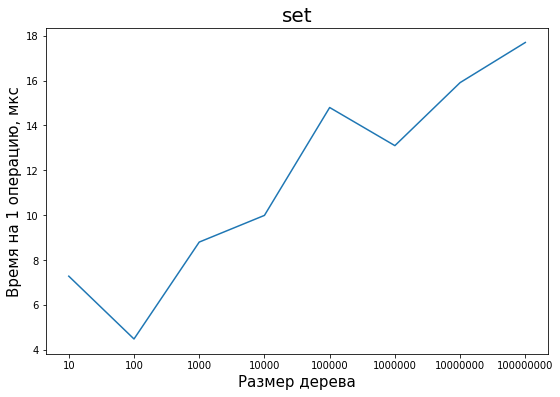

In [7]:
for test_group in test_groups:
    DrawPlot(means[test_group], y_label="Время на 1 операцию, мкс", x_label="Размер дерева", title=test_group)

### 4. Вывод

Графики позволяют верить в то, что все операции с структурой происходят за $O(\log{n})$ времени. Ступенчатость графиков, возможно, обусловленна "примерной ступенчатостью" высоты дерева в зависимости от числа элементов.